In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('sample_data/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
df['User ID'].value_counts()

385    1
310    1
137    1
101    1
623    1
      ..
753    1
389    1
792    1
783    1
687    1
Name: User ID, Length: 1000, dtype: int64

In [5]:
df['Gender'].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [7]:
df['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

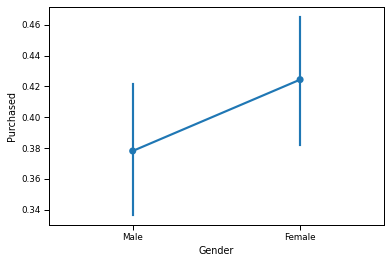

In [16]:
sns.pointplot(x="Gender", y="Purchased", data=df)
plt.show()

In [19]:
categorical = ["Gender"]

In [20]:
df_final = pd.get_dummies(df, columns=categorical, drop_first=True)

In [21]:
df_final

,User ID,Age,AnnualSalary,Purchased,Gender_Male
0,385,35,20000,0,1
1,681,40,43500,0,1
2,353,49,74000,0,1
3,895,40,107500,1,1
4,661,25,79000,0,1
...,...,...,...,...,...
995,863,38,59000,0,1
996,800,47,23500,0,0
997,407,28,138500,1,0
998,299,48,134000,1,0


In [27]:
df_final['Gender_Male'].value_counts()

0    516
1    484
Name: Gender_Male, dtype: int64

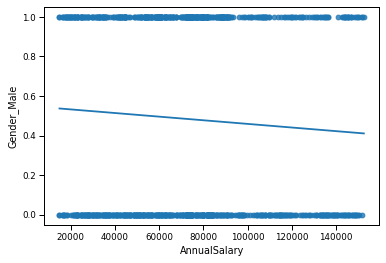

In [30]:
ax = sns.regplot(x="AnnualSalary", y="Gender_Male", data=df_final,ci=None)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df_final.drop('Purchased', axis=1)
y = df_final['Purchased']
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.3, random_state= 42)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

In [40]:
predictions = model.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       172
           1       0.87      0.81      0.84       128

    accuracy                           0.87       300
   macro avg       0.87      0.86      0.87       300
weighted avg       0.87      0.87      0.87       300



[[157  15]
 [ 24 104]]
